In [31]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM, Bidirectional

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [70]:
RNN_model = Sequential()
RNN_model.add(Embedding(max_features, 32))
RNN_model.add(SimpleRNN(32))
RNN_model.add(Dense(1, activation="sigmoid"))

In [71]:
RNN_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
RNN_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
RNN_history = RNN_model.fit(
    x_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - acc: 0.5341 - loss: 0.6912 - val_acc: 0.7605 - val_loss: 0.5268
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 27s 194ms/step - acc: 0.7852 - loss: 0.4747 - val_acc: 0.7944 - val_loss: 0.4577
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 28s 206ms/step - acc: 0.8579 - loss: 0.3434 - val_acc: 0.7968 - val_loss: 0.4612
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 27s 200ms/step - acc: 0.8424 - loss: 0.3937 - val_acc: 0.7977 - val_loss: 0.4942
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 47s 245ms/step - acc: 0.9211 - loss: 0.2082 - val_acc: 0.8164 - val_loss: 0.4529


782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - acc: 0.8194 - loss: 0.4533
Test Loss: 0.4448288679122925
Test Accuracy: 0.8230400085449219


C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_3496\1932334835.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, "b", label="Точність на тренуванні", color="red")
C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_3496\1932334835.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(


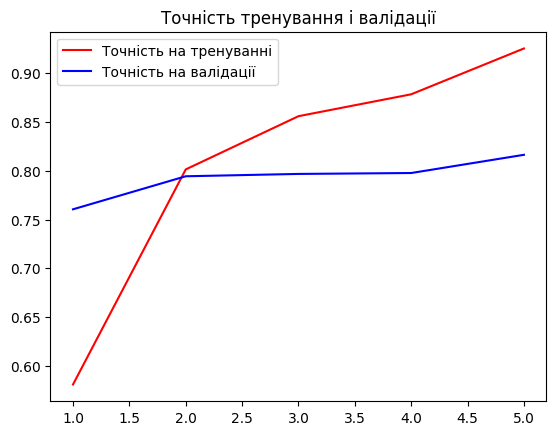

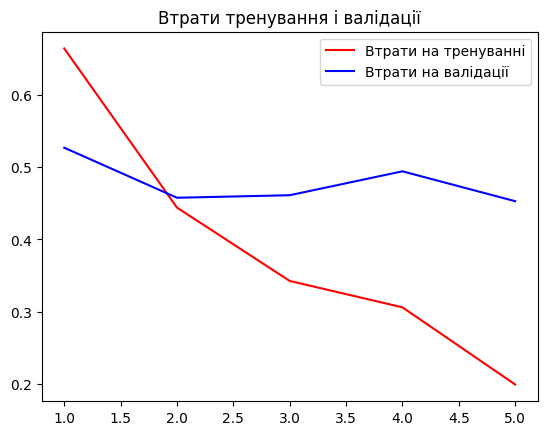

In [73]:
test_loss, test_acc = RNN_model.evaluate(x_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

acc = RNN_history.history["acc"]
val_acc = RNN_history.history["val_acc"]
loss = RNN_history.history["loss"]
val_loss = RNN_history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Точність на тренуванні", color="red")
plt.plot(
    epochs, val_acc, "b", label="Точність на валідації"
)
plt.title("Точність тренування і валідації")
plt.legend()

plt.figure()

plt.plot(
    epochs, loss, "b", label="Втрати на тренуванні", color="red"
)
plt.plot(
    epochs, val_loss, "b", label="Втрати на валідації"
)
plt.title("Втрати тренування і валідації")
plt.legend()

plt.show()

Шляхом дослідів визначили, що найкращим оптимізатором є RMSProp (Adam значно краще навчається на тренувальних даних, але точність на тестових виявляється нижчою за RMSProp), а найкращою функцією втрат є бінарна кросентропія. Загалом можемо побачити, що наша модель добре навчається до третьої епохи після чого відбувається перенавчання.

In [36]:
GRU_model = Sequential()
GRU_model.add(Embedding(max_features, 32))
GRU_model.add(GRU(32))
GRU_model.add(Dense(1, activation="sigmoid"))

In [37]:
GRU_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
GRU_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
GRU_history = GRU_model.fit(
    x_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 81s 563ms/step - acc: 0.5634 - loss: 0.6759 - val_acc: 0.7796 - val_loss: 0.4774
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 553ms/step - acc: 0.8032 - loss: 0.4377 - val_acc: 0.8244 - val_loss: 0.3880
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 598ms/step - acc: 0.8480 - loss: 0.3566 - val_acc: 0.8581 - val_loss: 0.3364
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 78s 567ms/step - acc: 0.8745 - loss: 0.3048 - val_acc: 0.8547 - val_loss: 0.3597
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 85s 618ms/step - acc: 0.8851 - loss: 0.2876 - val_acc: 0.8593 - val_loss: 0.3334


782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - acc: 0.8570 - loss: 0.3365
Test Loss: 0.3359649181365967
Test Accuracy: 0.8582800030708313


C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_3496\4229081874.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, "b", label="Точність на тренуванні", color="red")
C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_3496\4229081874.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(


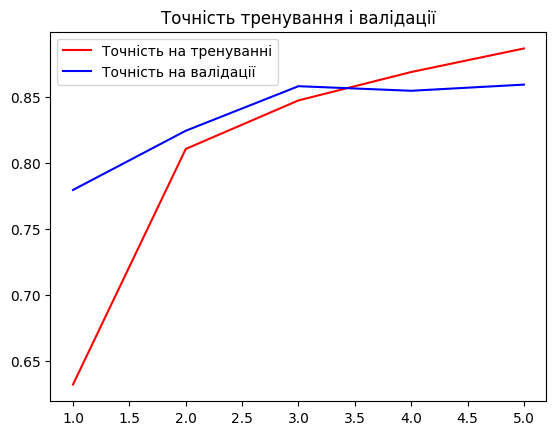

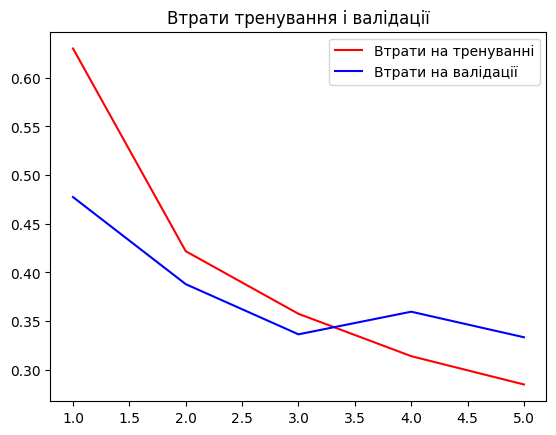

In [39]:
test_loss, test_acc = GRU_model.evaluate(x_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

acc = GRU_history.history["acc"]
val_acc = GRU_history.history["val_acc"]
loss = GRU_history.history["loss"]
val_loss = GRU_history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Точність на тренуванні", color="red")
plt.plot(
    epochs, val_acc, "b", label="Точність на валідації"
)
plt.title("Точність тренування і валідації")
plt.legend()

plt.figure()

plt.plot(
    epochs, loss, "b", label="Втрати на тренуванні", color="red"
)
plt.plot(
    epochs, val_loss, "b", label="Втрати на валідації"
)
plt.title("Втрати тренування і валідації")
plt.legend()

plt.show()

Бачимо, що GRU модель показує себе значно краще, але і використувує значно більше ресурсів.

In [57]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, 32))
LSTM_model.add(LSTM(32))
LSTM_model.add(Dense(1, activation="sigmoid"))

In [58]:
LSTM_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
LSTM_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
LSTM_history = LSTM_model.fit(
    x_train, y_train, epochs=3, batch_size=128, validation_split=0.3
)

Epoch 1/3
137/137 ━━━━━━━━━━━━━━━━━━━━ 52s 360ms/step - acc: 0.5794 - loss: 0.6733 - val_acc: 0.8009 - val_loss: 0.4448
Epoch 2/3
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 404ms/step - acc: 0.8034 - loss: 0.4423 - val_acc: 0.8307 - val_loss: 0.4035
Epoch 3/3
137/137 ━━━━━━━━━━━━━━━━━━━━ 54s 393ms/step - acc: 0.8613 - loss: 0.3360 - val_acc: 0.8685 - val_loss: 0.3196


782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - acc: 0.8657 - loss: 0.3223
Test Loss: 0.32050836086273193
Test Accuracy: 0.8666399717330933


C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_3496\3841939284.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, "b", label="Точність на тренуванні", color="red")
C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_3496\3841939284.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, "b", label="Втрати на тренуванні", color="red")


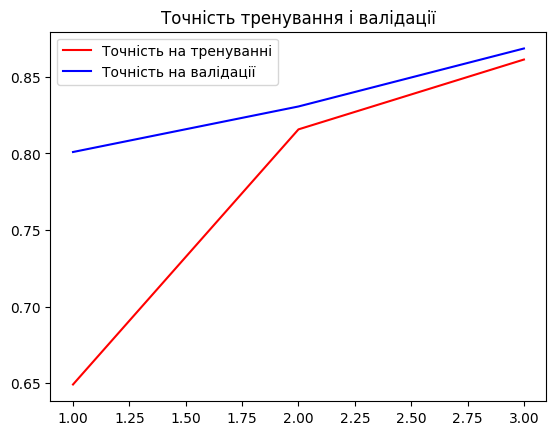

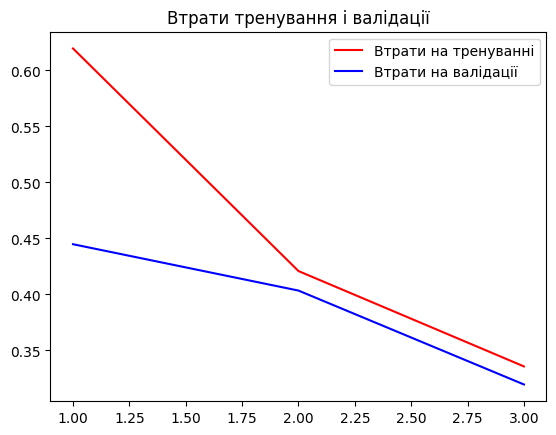

In [60]:
test_loss, test_acc = LSTM_model.evaluate(x_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

acc = LSTM_history.history["acc"]
val_acc = LSTM_history.history["val_acc"]
loss = LSTM_history.history["loss"]
val_loss = LSTM_history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Точність на тренуванні", color="red")
plt.plot(epochs, val_acc, "b", label="Точність на валідації")
plt.title("Точність тренування і валідації")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "b", label="Втрати на тренуванні", color="red")
plt.plot(epochs, val_loss, "b", label="Втрати на валідації")
plt.title("Втрати тренування і валідації")
plt.legend()

plt.show()

Можемо побачити, що модель LSTM повільніша за GPU але при цьому досягає більшої точності за меншої кількості епох. А також дуже сильно підвержена переначанню, оскільки якщо збільшити кількість епох - точність на тестових даних дуже швидко падає.

In [61]:
BRNN_model = Sequential()
BRNN_model.add(Embedding(max_features, 32))
BRNN_model.add(Bidirectional(LSTM(32)))
BRNN_model.add(Dense(1, activation="sigmoid"))

In [62]:
BRNN_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
BRNN_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
BRNN_history = BRNN_model.fit(
    x_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - acc: 0.5442 - loss: 0.6815 - val_acc: 0.7913 - val_loss: 0.4923
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - acc: 0.7818 - loss: 0.4772 - val_acc: 0.8165 - val_loss: 0.4193
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - acc: 0.8509 - loss: 0.3574 - val_acc: 0.8148 - val_loss: 0.4304
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - acc: 0.8729 - loss: 0.3095 - val_acc: 0.8751 - val_loss: 0.3071
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - acc: 0.8912 - loss: 0.2741 - val_acc: 0.8628 - val_loss: 0.3196


782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - acc: 0.8645 - loss: 0.3208
Test Loss: 0.31840282678604126
Test Accuracy: 0.8654400110244751


C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_3496\3387071355.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, "b", label="Точність на тренуванні", color="red")
C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_3496\3387071355.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, "b", label="Втрати на тренуванні", color="red")


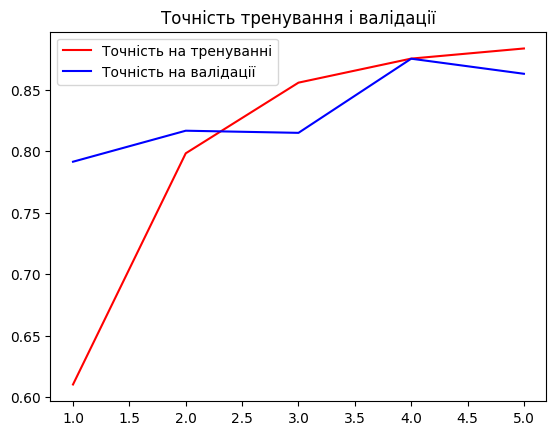

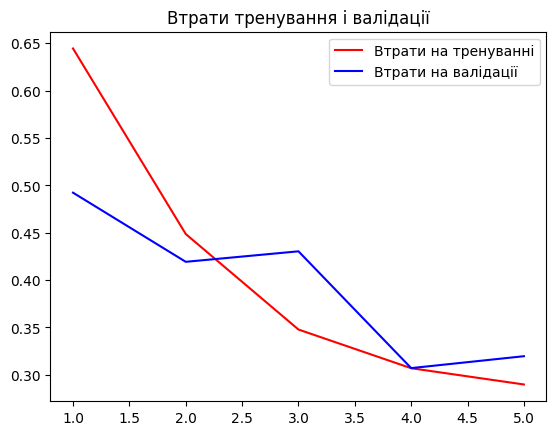

In [64]:
test_loss, test_acc = BRNN_model.evaluate(x_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

acc = BRNN_history.history["acc"]
val_acc = BRNN_history.history["val_acc"]
loss = BRNN_history.history["loss"]
val_loss = BRNN_history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Точність на тренуванні", color="red")
plt.plot(epochs, val_acc, "b", label="Точність на валідації")
plt.title("Точність тренування і валідації")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "b", label="Втрати на тренуванні", color="red")
plt.plot(epochs, val_loss, "b", label="Втрати на валідації")
plt.title("Втрати тренування і валідації")
plt.legend()

plt.show()

Можемо побачити, що точність двосторонньої моделі приблизно така ж як і моделі LSTM, але вона займає набагато більше часу і ресурсів. Також має місце переначання після 5-ої епохи.

In [65]:
DRNN_model = Sequential()
DRNN_model.add(Embedding(max_features, 32))
DRNN_model.add(Bidirectional(LSTM(32, return_sequences=True)))
DRNN_model.add(Bidirectional(LSTM(32)))
DRNN_model.add(Dense(1, activation="sigmoid"))

In [66]:
DRNN_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
DRNN_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
DRNN_history = DRNN_model.fit(
    x_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - acc: 0.5302 - loss: 0.6850 - val_acc: 0.7777 - val_loss: 0.4944
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - acc: 0.7896 - loss: 0.4705 - val_acc: 0.7501 - val_loss: 0.5908
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - acc: 0.8450 - loss: 0.3707 - val_acc: 0.8593 - val_loss: 0.3317
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - acc: 0.8765 - loss: 0.3031 - val_acc: 0.8525 - val_loss: 0.3395
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - acc: 0.9041 - loss: 0.2539 - val_acc: 0.8488 - val_loss: 0.3650


782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - acc: 0.8504 - loss: 0.3679
Test Loss: 0.3605938255786896
Test Accuracy: 0.8522800207138062


C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_3496\1663504212.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, "b", label="Точність на тренуванні", color="red")
C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_3496\1663504212.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, "b", label="Втрати на тренуванні", color="red")


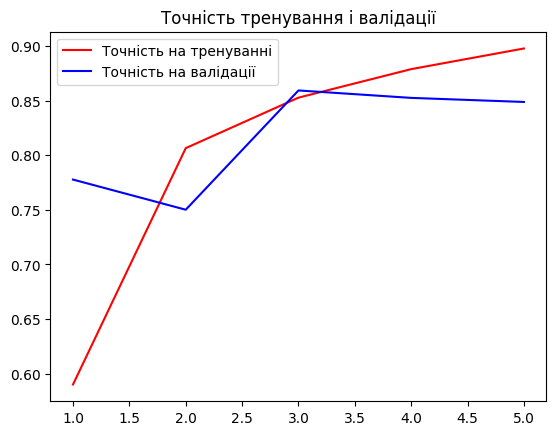

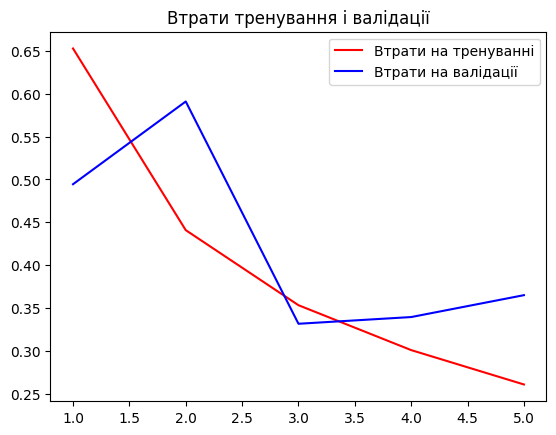

In [69]:
test_loss, test_acc = DRNN_model.evaluate(x_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

acc = DRNN_history.history["acc"]
val_acc = DRNN_history.history["val_acc"]
loss = DRNN_history.history["loss"]
val_loss = DRNN_history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Точність на тренуванні", color="red")
plt.plot(epochs, val_acc, "b", label="Точність на валідації")
plt.title("Точність тренування і валідації")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "b", label="Втрати на тренуванні", color="red")
plt.plot(epochs, val_loss, "b", label="Втрати на валідації")
plt.title("Втрати тренування і валідації")
plt.legend()

plt.show()

Можемо побачити, що точність глибокої моделі трошки гірша за точність попередніх моделей, а швидкість виконання в декілька разів повільніша. Після третьої епохи також починається переначання.

__Висновок:__ Порівнюючи всі алгоритми можемо сказати, що для нашого датасету самими оптимальними виявилися моделі GPU i LSTM. GPU досягає точності в ~86% за 6:40 хвилин і 5 епох, а LSTM досягає тієж точності за 3 епохи і за 2:40 хвилин. Глибокий і двосторонній алгоритми працюють набагато довше показуючи ту ж саму точність (можуть бути ефективнішими при наявності більшої кількості даних). А звичайна модель рекурентної нейронної мережі за той же час що і LSTM і кількості епох: 5 не може досягти тієж точності що і LSTM або GPU.